In [ ]:
Расчитываются критерии Фишера, Стьюдента и Манна-Уитни.
Критерий Стьюдента нужен когда распределение нормальное.
Критерий Манна-Уитни может использоваться и для нормального и для не нормального распределения.
Критерий фишера используется для определения равенства дисперсий.
Критерий Фишера является несколько более жестким, чем критерий Стьюдента,
а потому более предпочтителен в тех случаях,
когда возникают сомнения в достоверности различий
(например, если по критерию Стьюдента различия достоверны при нулевом и недостоверны при первом уровне значимости).

Используйте датасет FPS_hw_x_df_x_taxi.xlsx.
Исследуйте данные и постройте графики плотности распределения дистанций поездок для классов Economy и Comfort.

Проверьте гипотезу: «На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.

Сделайте выводы по результатам проверки.

 Для определения предпочтений понадобится изучение описательных статистик и графиков по классам.

 Критерии оценки задания:

Вычислены описательные статистики.

Построено распределение задействованных в гипотезе данных.

Проведена проверка гипотезы соответствующим статистическим критерием.

Сделаны выводы по результатам проверки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import seaborn as sns
# Подключение библиотек статистических критериев
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [ ]:
df=pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')

In [ ]:
df.head(5)

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
df_economy = df[df['offer_class_group']== 'Economy']
df_comfort = df[df['offer_class_group']== 'Comfort']

In [ ]:
# Проверка длины массивов
print ('Длины массивов равны:', len(df_economy)==len(df_comfort))

Длины массивов равны: True


Исследуйте данные и постройте графики плотности распределения дистанций поездок для классов Economy и Comfort.

C:\Users\koloskov\AppData\Local\Temp\ipykernel_18908\1776826382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_economy['distance_km'],50)
C:\Users\koloskov\AppData\Local\Temp\ipykernel_18908\1776826382.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comfort['distance_km'],50)


<function matplotlib.pyplot.show(close=None, block=None)>

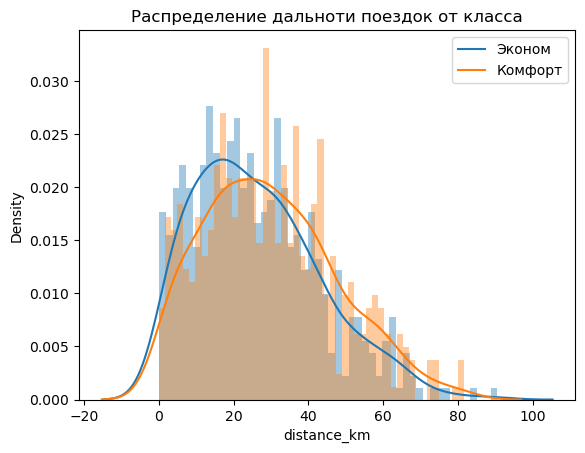

In [ ]:
sns.distplot(df_economy['distance_km'],50)
sns.distplot(df_comfort['distance_km'],50)
plt.title('Распределение дальноти поездок от класса')
plt.legend(['Эконом', 'Комфорт'])
plt.show

In [ ]:
df_economy.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [ ]:
df_comfort.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
#  Параметры похожи.

Проверка гипотезы: «На дальние поездки пользователи предпочитают Economy-классу более комфортные условия поездки в Comfort-классе.

H0 -Стоимость поездок не отличается.

H1 - Стоимость поездок отличается значительно

In [ ]:
alpha = 5 # Установка уровня значимости

In [ ]:
# Тест Фишера - "отношение дисперсий дистанций"
import scipy.stats as stats
# Определение дисперсии
disp_comf= df_comfort['distance_km'].var()
disp_econ= df_economy['distance_km'].var()
[disp_comf,disp_econ]

[311.3334293306456, 289.5494522563771]

In [ ]:
# Определение
fish= disp_comf/disp_econ
fish

1.0752340469115451

In [ ]:
#Дисперсии отличаются на 7 процентов. Сходимость достаточно высокая.

In [ ]:
# Проведение Т-теста (t-критерий тьюдента) Проверка того,что уровень стоимость поездок не отичается/ альфа= 5%
result =ttest_ind(df_comfort['distance_km'],df_economy['distance_km'])
print ('p-value: %8f' % result.pvalue)

if ( result.pvalue<alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезы')

p-value: 0.001568
Отвергаем нулевую гипотезу


In [ ]:
# стоимость поездок отличается значительно

In [ ]:
# Проведение теста Манна- Уитни (U-критерий Манна- Уитни)

result =mannwhitneyu(df_comfort['distance_km'],df_economy['distance_km'])

print ('p-value: %8f' % result.pvalue)

if ( result.pvalue<alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Принимаем нулевую гипотезы')


p-value: 0.001285
Отвергаем нулевую гипотезу


Вывод:

Распределения похожи. Критерий фишера составлет 7%, что не много.

Стоимость поездки в завимости от расстояния зависит от класса автомобиля с точностью 95%.

Критерии Стьюдента и Манна-Уитни подтвержают это.